Generated N(0,1) r.v =  [-0.00433724 -0.01089675 -0.71685491 -0.02308275 -0.45664623 -0.01126896
  1.50924232 -1.51687533 -0.18200313 -1.27890989  1.93696075 -0.50273478
  0.61970858  1.93395233  1.95583277 -0.19384525 -1.19893355 -0.39652729
  0.94956008 -0.3052183   0.57904892 -2.23158179 -1.07804947  0.47019291
  0.13360868 -1.14920242  1.44431513  0.46242972 -0.94149763 -1.23781929
  0.75838873  1.28480193  0.79121044  0.35650437 -1.47128046 -1.01379662
 -0.50106642  1.00745927 -0.26392436 -1.3575849   0.21492818 -2.62033353
  0.71387315 -0.15360119  1.66401161 -1.2043101  -0.97565912 -0.10434001
 -2.05405982 -0.15889621 -1.5569037  -0.06757058 -0.85988489 -0.26671735
  0.06338464 -0.286077    0.06167114 -0.4927595   0.29737981 -1.24219242
 -1.40008751  1.64323339  3.11677453 -0.56406561 -0.17631104  0.50530255
 -0.82771143  0.68229991 -0.76703925  0.17039619  0.16355876 -1.54540257
 -1.39716741  0.32945958 -0.57697416  1.53398429 -0.44558078  0.24964411
  1.7139567   1.27318527  1

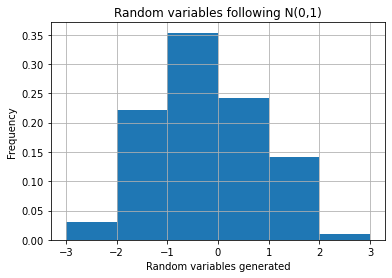

In [16]:
## Generate random numbers (L'Ecuyer)

import numpy as np 
import matplotlib.pyplot as plt
import math

# 1 - Obtaining U' set of random numbers 

n = 200
m1 = 2**32 - 209
m2 = 2**32 - 22853

x1 = np.zeros(n+3)
y1 = np.zeros(n+3)
U1 = np.zeros(n)   # Generated random numbers 

x1[0] = 0.4
y1[0] = 0.4

x1[1] = 8
y1[1] = 15

x1[2] = 25
y1[2] = 5

for i in range(3,n+3):
    x1[i] = (1403580*x1[i-2] - 810728*x1[i-3]) % m1
    y1[i] = (527612*y1[i-2] - 1370589*y1[i-3]) % m2
    if x1[i]<=y1[i]:
        U1[i-3] = (x1[i]-y1[i]+m1)/(m1+1)
    else:
        U1[i-3] = (x1[i]-y1[i])/(m1+1)
#print(U1)

# 2 - Obtaining U set of random numbers

m1 = 2**32 - 209
m2 = 2**32 - 22853

x = np.zeros(n+3)
y = np.zeros(n+3)
U = np.zeros(n)   # Generated random numbers 

x[0] = 0.2
y[0] = 0.6

x[1] = 8
y[1] = 15

x[2] = 25
y[2] = 5

for i in range(3,n+3):
    x[i] = (1403580*x[i-2] - 810728*x[i-3]) % m1
    y[i] = (527612*y[i-2] - 1370589*y[i-3]) % m2
    if x[i]<=y[i]:
        U[i-3] = (x[i]-y[i]+m1)/(m1+1)
    else:
        U[i-3] = (x[i]-y[i])/(m1+1)
#print(U)
#print(len(U))



## 3_a) - Generating U(0,1) numbers in Q1 


m1 = 2**32 - 209
m2 = 2**32 - 22853

xq1 = np.zeros(n+3)
yq1 = np.zeros(n+3)
Uq1 = np.zeros(n)   # Generated random numbers 

xq1[0] = 15
yq1[0] = 20

xq1[1] = 8
yq1[1] = 15

xq1[2] = 25
yq1[2] = 5

for i in range(3,n+3):
    xq1[i] = (1403580*xq1[i-2] - 810728*xq1[i-3]) % m1
    yq1[i] = (527612*yq1[i-2] - 1370589*yq1[i-3]) % m2
    if xq1[i]<=yq1[i]:
        Uq1[i-3] = (xq1[i]-yq1[i]+m1)/(m1+1)
    else:
        Uq1[i-3] = (xq1[i]-yq1[i])/(m1+1)
        
        
## 3_b) - Generating random variables following Exp(3)
# (using inverse-transform method)


U_1 = np.zeros(n)  # 1-U~U(0,1)
X = np.zeros(n)   # Generated random variables
L = 1    # Lambda = 1
exp = np.zeros(n) # holds ln[1-U~U(0,1)]

for i in range(n):
    U_1[i] = 1 - Uq1[i]
    exp[i] = np.log(U_1[i])
    X[i] = (-1/L)*exp[i]
#print("Random numbers following Exp(1)",X)



## 4 - Generating r.v following N(0,1)

I = np.zeros(n)
exp2 = np.zeros(n)
Z = np.zeros(100)

for i in range(n):
    if U[i]<= 0.5:
        I[i] = 1 
    if U[i]> 0.5:
        I[i] = 0 

count=0
k=0

while count<100:
    if U1[k]<= math.exp(-0.5*(X[k]-1)*(X[k]-1)):
        Z[count]=(1-2*I[k])*X[k]
        count=count+1
    k=k+1
    
#while count<100:
    #k = k+1
    #if U1[k-1]<= math.exp(-0.5*(X[k-1]-1)*(X[k-1]-1)):
        #Z[count]=(1-2*I[k-1])*X[k-1]
        #count=count+1
            
        
print("Generated N(0,1) r.v = ",Z)

print(len(Z))

## Plotting the graph 

plt.figure(1)
plt.hist(Z,bins=range(-3,3+1),density=True)

plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following N(0,1)")
plt.grid()
plt.show()


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

# 1 - Obtaining U' set of random numbers 

n = 5
m1 = 2**32 - 209
m2 = 2**32 - 22853

x1 = np.zeros(n+3)
y1 = np.zeros(n+3)
U1 = np.zeros(n)   # Generated random numbers 

x1[0] = 0.4
y1[0] = 0.4

x1[1] = 8
y1[1] = 15

x1[2] = 25
y1[2] = 5

for i in range(3,n+3):
    x1[i] = (1403580*x1[i-2] - 810728*x1[i-3]) % m1
    y1[i] = (527612*y1[i-2] - 1370589*y1[i-3]) % m2
    if x1[i]<=y1[i]:
        U1[i-3] = (x1[i]-y1[i]+m1)/(m1+1)
    else:
        U1[i-3] = (x1[i]-y1[i])/(m1+1)
#print(U1)

# 2 - Obtaining U set of random numbers

m1 = 2**32 - 209
m2 = 2**32 - 22853

x = np.zeros(n+3)
y = np.zeros(n+3)
U = np.zeros(n)   # Generated random numbers 

x[0] = 0.2
y[0] = 0.6

x[1] = 8
y[1] = 15

x[2] = 25
y[2] = 5

for i in range(3,n+3):
    x[i] = (1403580*x[i-2] - 810728*x[i-3]) % m1
    y[i] = (527612*y[i-2] - 1370589*y[i-3]) % m2
    if x[i]<=y[i]:
        U[i-3] = (x[i]-y[i]+m1)/(m1+1)
    else:
        U[i-3] = (x[i]-y[i])/(m1+1)
#print(U)
#print(len(U))



## 3_a) - Generating U(0,1) numbers in Q1 


m1 = 2**32 - 209
m2 = 2**32 - 22853

xq1 = np.zeros(n+3)
yq1 = np.zeros(n+3)
Uq1 = np.zeros(n)   # Generated random numbers 

xq1[0] = 15
yq1[0] = 20

xq1[1] = 8
yq1[1] = 15

xq1[2] = 25
yq1[2] = 5

for i in range(3,n+3):
    xq1[i] = (1403580*xq1[i-2] - 810728*xq1[i-3]) % m1
    yq1[i] = (527612*yq1[i-2] - 1370589*yq1[i-3]) % m2
    if xq1[i]<=yq1[i]:
        Uq1[i-3] = (xq1[i]-yq1[i]+m1)/(m1+1)
    else:
        Uq1[i-3] = (xq1[i]-yq1[i])/(m1+1)
        
        
## 3_b) - Generating random variables following Exp(3)
# (using inverse-transform method)


U_1 = np.zeros(n)  # 1-U~U(0,1)
X = np.zeros(n)   # Generated random variables
L = 1    # Lambda = 1
exp = np.zeros(n) # holds ln[1-U~U(0,1)]

for i in range(n):
    U_1[i] = 1 - Uq1[i]
    exp[i] = np.log(U_1[i])
    X[i] = (-1/L)*exp[i]
#print("Random numbers following Exp(1)",X)



## 4 - Generating r.v following N(0,1)

I = np.zeros(n)
exp2 = np.zeros(n)
Z = np.zeros(100)

for i in range(n):
    if U[i]<= 0.5:
        I[i] = 1 
    if U[i]> 0.5:
        I[i] = 0 

count=0
k=0

while count<100:
    if U1[k]<= math.exp(-0.5*(X[k]-1)*(X[k]-1)):
        Z[count]=(1-2*I[k])*X[k]
        count=count+1
    k=k+1
    
#while count<100:
    #k = k+1
    #if U1[k-1]<= math.exp(-0.5*(X[k-1]-1)*(X[k-1]-1)):
        #Z[count]=(1-2*I[k-1])*X[k-1]
        #count=count+1
            
        
print("Generated N(0,1) r.v = ",Z)

print(len(Z))

## Plotting the graph 

plt.figure(1)
plt.hist(Z,bins=range(-3,3+1),density=True)

plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following N(0,1)")
plt.grid()
plt.show()
    

IndexError: index 5 is out of bounds for axis 0 with size 5